In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
vaccine = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')
vaccine.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI
0,09/07/2021,13123,36,Gilmer County,GA,10.1,3176,3176.0,11.6,3018,...,13.4,3416.0,13.4,1123.0,14.0,C,9,9,9,9
1,09/07/2021,12123,36,Taylor County,FL,29.8,6432,6432.0,34.4,6288,...,47.3,8580.0,49.6,3486.0,77.0,D,13,14,14,15
2,09/07/2021,12091,36,Okaloosa County,FL,44.3,93303,93301.0,52.2,89724,...,63.4,108126.0,66.0,32599.0,94.8,B,7,8,8,8
3,09/07/2021,16017,36,Bonner County,ID,34.3,15689,NaN,NaN,15661,...,NaN,17541.0,47.8,8041.0,69.2,A,2,NaN,3,3
4,09/07/2021,18173,36,Warrick County,IN,54.3,34203,34202.0,63.7,32025,...,68.8,34460.0,71.5,10739.0,95.3,A,4,4,4,4


In [3]:
vaccine = vaccine.iloc[:, [0, 4, 6, 14]]
vaccine.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,09/07/2021,GA,3176,3677.0
1,09/07/2021,FL,6432,8840.0
2,09/07/2021,FL,93303,113256.0
3,09/07/2021,ID,15689,17574.0
4,09/07/2021,IN,34203,36974.0


In [4]:
vaccine_NY = vaccine[vaccine['Recip_State'] == 'NY']
vaccine_NY = vaccine_NY.reset_index()
del vaccine_NY['index']
vaccine_NY.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,09/07/2021,NY,170942,189174.0
1,09/07/2021,NY,117390,125878.0
2,09/07/2021,NY,62077,67943.0
3,09/07/2021,NY,70291,75560.0
4,09/07/2021,NY,35338,38547.0


In [5]:
vaccine_NY['Date'] = pd.to_datetime(vaccine_NY['Date'])
vaccine_NY.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,2021-09-07,NY,170942,189174.0
1,2021-09-07,NY,117390,125878.0
2,2021-09-07,NY,62077,67943.0
3,2021-09-07,NY,70291,75560.0
4,2021-09-07,NY,35338,38547.0


In [6]:
vaccine_NY = vaccine_NY.groupby('Date').sum()
vaccine_NY.head()

,Series_Complete_Yes,Administered_Dose1_Recip
Date,,
2020-12-13,0,0.0
2020-12-14,0,0.0
2020-12-15,0,0.0
2020-12-16,0,228.0
2020-12-17,1,2183.0


In [7]:
vaccine_NY['Total population'] = 20400000
vaccine_NY['Percemt of complete'] = (vaccine_NY['Series_Complete_Yes']/vaccine_NY['Total population'])*100
vaccine_NY['Percemt of Dose1'] = (vaccine_NY['Administered_Dose1_Recip']/vaccine_NY['Total population'])*100
vaccine_NY.tail()

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
Date,,,,,
2021-09-03,11785885,13204029.0,20400000,57.773946,64.725632
2021-09-04,11812282,13236154.0,20400000,57.903343,64.883108
2021-09-05,11836015,13260012.0,20400000,58.019681,65.000059
2021-09-06,11855109,13280583.0,20400000,58.113279,65.100897
2021-09-07,11868703,13299568.0,20400000,58.179917,65.193961


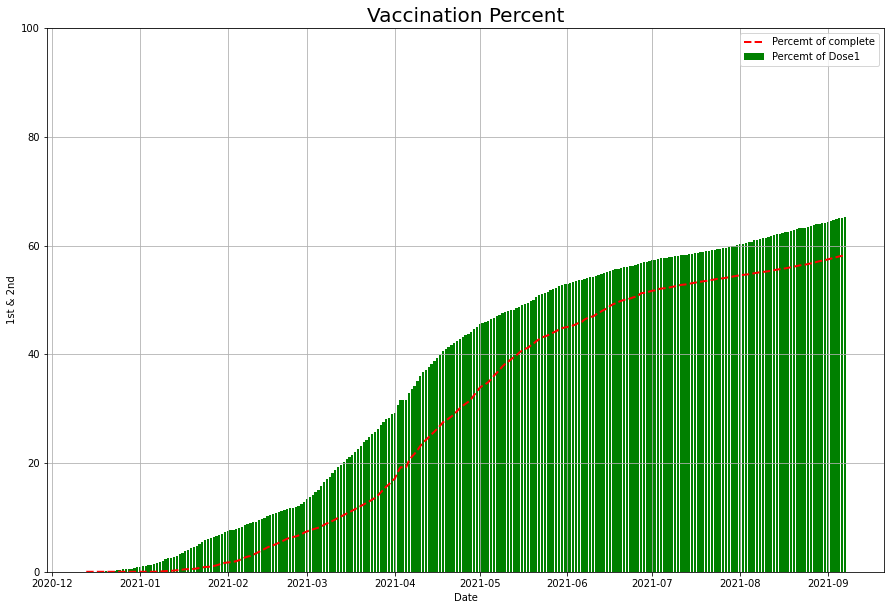

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))

x = vaccine_NY.index
y1 = vaccine_NY['Percemt of complete']
y2 = vaccine_NY['Percemt of Dose1']

ax.plot(x, y1, 'r--', linewidth=2)
# ax.plot(x, y2, 'r:')
# plt.bar(x, y1, color='g')
plt.bar(x, y2, color='g')
plt.ylim(0, 100)
plt.title('Vaccination Percent', fontsize=20)
plt.legend(['Percemt of complete', 'Percemt of Dose1'])
plt.xlabel('Date')
plt.ylabel('1st & 2nd')
plt.grid()

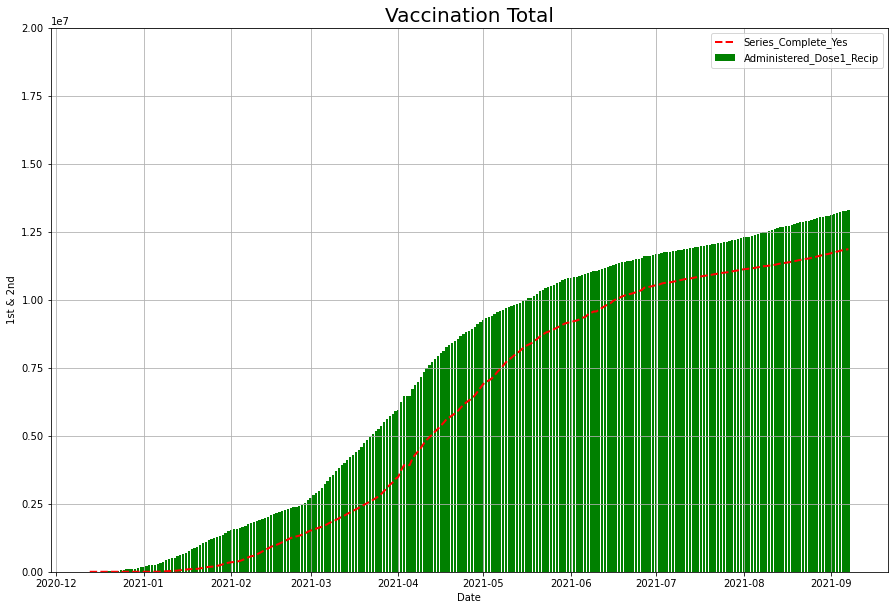

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))

x = vaccine_NY.index
y1 = vaccine_NY['Series_Complete_Yes']
y2 = vaccine_NY['Administered_Dose1_Recip']

ax.plot(x, y1, 'r--', linewidth=2)
# ax.plot(x, y2, 'r:')
# plt.bar(x, y1, color='g')
plt.bar(x, y2, color='g')
plt.ylim(0, 20000000)
plt.title('Vaccination Total', fontsize=20)
plt.legend(['Series_Complete_Yes', 'Administered_Dose1_Recip'])
plt.xlabel('Date')
plt.ylabel('1st & 2nd')
plt.grid()